In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_path = Path('/Users/alex/Desktop/upenn_fintech_all/10-Time-Series/Homework/Instructions/Starter_Code/yen.csv')
yen_futures = pd.read_csv(yen_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc['1990-01-01':,:]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


# Data Preparation

### Returns

In [4]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
yen_futures['Return'] = yen_futures.Last.pct_change()*100
#returns = returns.replace(-np.inf, np.nan).dropna()


### Lagged Returns 

In [5]:
# Create a lagged return using the shift function
yen_futures['Lagged Return'] = yen_futures.Return.shift()
yen_futures = yen_futures.dropna()
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged Return
Date,,,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,9775.0,203495.0,196924.0,-0.427829,0.409123
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.020460,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,0.020465,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,-0.173913,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,-0.010248,-0.173913


### Train Test Split

In [6]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2017']
test = yen_futures['2018':]

In [7]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train['Lagged Return'].to_frame()
X_test = test['Lagged Return'].to_frame()
y_train = train['Return'].to_frame()
y_test = test['Return'].to_frame()

In [8]:
X_train

,Lagged Return
Date,
2014-02-18,0.409123
2014-02-19,-0.427829
2014-02-20,-0.020460
2014-02-21,0.020465
2014-02-24,-0.173913
...,...
2017-12-22,0.078953
2017-12-26,0.084526
2017-12-27,0.045043


# Linear Regression Model

In [9]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [10]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [11]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test
Results['Predicted Return'] = predictions

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

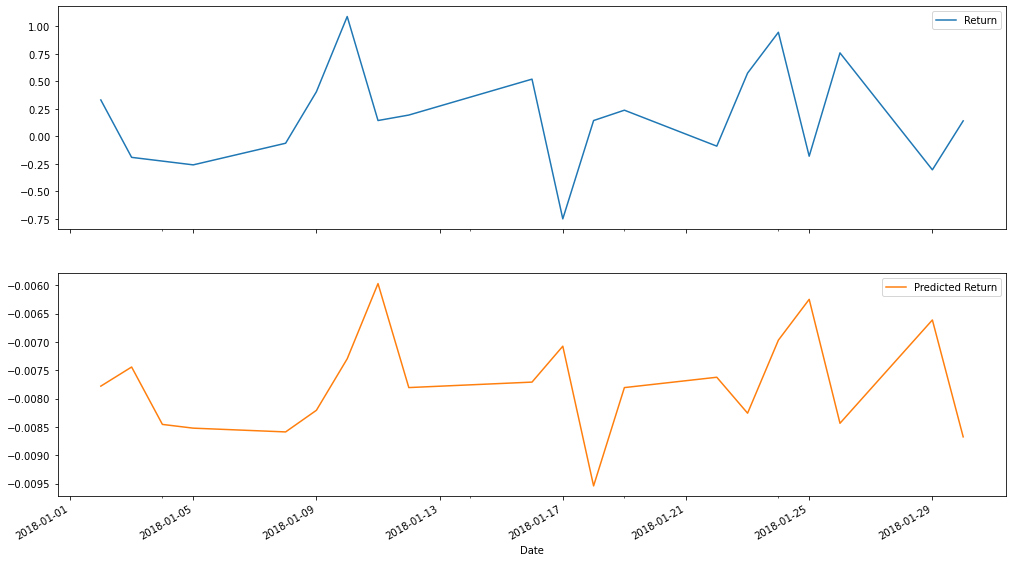

In [17]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True, figsize=(17,10))

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [15]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(Results['Return'], Results['Predicted Return'])

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)
print(f'Out-of-Sample RMSE: {rmse}')

Out-of-Sample RMSE: 0.40661184667470457


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [20]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results['In-Sample Predictions'] = model.predict(X_train)
# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(in_sample_results['Return'], in_sample_results['In-Sample Predictions'])

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
print(f'In-Sample RMSE: {in_sample_results}')

In-Sample RMSE:               Return  In-Sample Predictions
Date                                       
2014-02-18 -0.427829              -0.007290
2014-02-19 -0.020460              -0.008917
2014-02-20  0.020465              -0.008125
2014-02-21 -0.173913              -0.008045
2014-02-24 -0.010248              -0.008423
...              ...                    ...
2017-12-22  0.084526              -0.007932
2017-12-26  0.045043              -0.007921
2017-12-27 -0.157578              -0.007997
2017-12-28  0.270560              -0.008391
2017-12-29  0.157401              -0.007559

[967 rows x 2 columns]
